In [13]:
from models.mm import LogMM

Log_model = LogMM(n_components=2, tol=1e-4)

import numpy as np
import matplotlib.pyplot as plt

from models.models import DataLoader

import seaborn as sns

DATA_PATH="/afs/crc.nd.edu/group/dmsquare/vol3/tzhao2/weibo/data/repost/distr/"

loader = DataLoader(DATA_PATH)

real_data, pois, pid = loader.get_data(43)

## Fit the log normal mixture model
real_data = np.array(real_data)

Log_model.fit(real_data)

x = np.linspace(0, 25, 10000)
pdf1 = (np.exp(-(np.log(x) - Log_model._means[0])**2 / (2 * Log_model._vars[0]**2)) 
       / (x * Log_model._means[0] * np.sqrt(2 * np.pi)))
pdf2 = (np.exp(-(np.log(x) - Log_model._means[1])**2 / (2 * Log_model._vars[1]**2)) 
       / (x * Log_model._means[1] * np.sqrt(2 * np.pi)))

Start fitting the data to logNormal mixture model.
--------------------Parameters-------------------------
n_components = 2,tolerance=0.0001, max_iter=100, init_means = [1.         1.06097561], init_variance = [0.04785098 0.04785098], init_weights = [0.5 0.5]
-------------------------------------------------------
-227.35227522366205 -3372.6846011760485
[[0.38855325 0.61144675]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.60584187 0.39415813]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.60584187 0.39415813]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.21196333]
 [0.78803667 0.2119

[[0.80384091 0.19615909]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.80383511 0.19616489]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.80383511 0.19616489]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]
 [0.8039839  0.1960161 ]


/afs/crc.nd.edu/user/b/bni/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/afs/crc.nd.edu/user/b/bni/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/afs/crc.nd.edu/user/b/bni/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/afs/crc.nd.edu/user/b/bni/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/afs/crc.nd.edu/user/b/bni/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/afs/crc.nd.edu/user/b/bni/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


In [14]:
from sklearn.mixture import GaussianMixture

In [1]:
from models.mm import LogMM
import numpy as np
mu, sigma = 3., 1. # mean and standard deviation
s1 = np.random.lognormal(mu, sigma, 1000)
mu, sigma = 10, 0.5
s2 = np.random.lognormal(mu, sigma, 1000)

In [6]:
s = np.concatenate((s1, s2), axis=0)

In [11]:
Log_model = LogMM(n_components=2, max_iter=1000, tol=1e-10)
Log_model.fit(s)

Start fitting the data to logNormal mixture model.
--------------------Parameters-------------------------
n_components = 2,tolerance=1e-10, max_iter=1000, init_means = [   33.49547386 25145.85242999], init_variance = [2.51213202e+08 2.51213202e+08], init_weights = [0.5 0.5]
-------------------------------------------------------
-1386.2943611198905 -35431.48562497551
[[0.77872041 0.22127959]
 [0.77874379 0.22125621]
 [0.77873902 0.22126098]
 ...
 [0.77861241 0.22138759]
 [0.77858571 0.22141429]
 [0.77859252 0.22140748]]
-1057.1999820628953 -166182479.9301945
[[1.e-10 1.e+00]
 [1.e-10 1.e+00]
 [1.e-10 1.e+00]
 ...
 [1.e-10 1.e+00]
 [1.e-10 1.e+00]
 [1.e-10 1.e+00]]
-4.8052317088817905e-06 -34712.03372718863
[[1.00037560e-10 1.00000000e+00]
 [1.00037552e-10 1.00000000e+00]
 [1.00037554e-10 1.00000000e+00]
 ...
 [1.00037598e-10 1.00000000e+00]
 [1.00037607e-10 1.00000000e+00]
 [1.00037605e-10 1.00000000e+00]]
-4.806914090662567e-06 -34712.033556105576
[[1.00037559e-10 1.00000000e+00]
 [1

In [12]:
Log_model._best_iter

4

In [27]:
GMM = GaussianMixture(n_components=2, covariance_type="spherical")

In [28]:
GMM.fit(real_data.reshape((-1, 1)))

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
GMM.means_

array([[1.        ],
       [2.24968257]])

In [30]:
print(GMM.precisions_)
print(GMM.weights_)

[1.00000000e+06 2.28421798e+00]
[0.97560356 0.02439644]


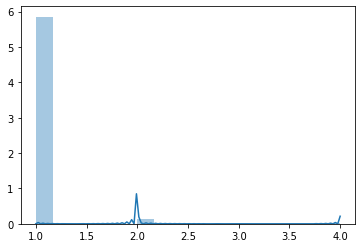

In [31]:
sns.distplot(real_data)

## Log_model._best_iter

In [3]:
Log_model._weights

array([nan, nan])

In [4]:
Log_model._vars

array([nan, nan])